In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np

from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


**Stage 1:** Setting up the data

In [ ]:
# Import dataset from the link below
df= pd.read_csv('https://raw.githubusercontent.com/PannaD8ta/Data/master/Mall_Customers.csv', sep=',')

# Checks the shape of the data
df.shape

(200, 5)

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (190, 5)
Unseen Data For Predictions: (10, 5)


**Stage 2:** Setting up Environment

In [ ]:
from pycaret.clustering import *
# 'profile=true' displays a data profile for EDA on the selected dataset
cluster = setup(data = df, normalize = True, session_id = 123, profile = True)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Stage 3:** Create a Model

In [10]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3195,85.1485,1.1793,0,0,0


In [11]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [20]:
# 'n_clusters' default parameter is set to 4, 
kmodes = create_model('kmodes', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0176,11.8977,5.1286,0,0,0


In [21]:
print(kmodes)

KModes(cat_dissim=<function matching_dissim at 0x7ff9be6d81e0>, init='Cao',
       max_iter=100, n_clusters=4, n_init=1, n_jobs=-1, random_state=123,
       verbose=0)


**Stage 4:** Assign a Model

In [24]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 0
1,2,Male,21,15,81,Cluster 0
2,3,Female,20,16,6,Cluster 0
3,4,Female,23,16,77,Cluster 0
4,5,Female,31,17,40,Cluster 0


**Stage 5:** Plot a Model

In [25]:
# Cluster PCA Plot
plot_model(kmeans)

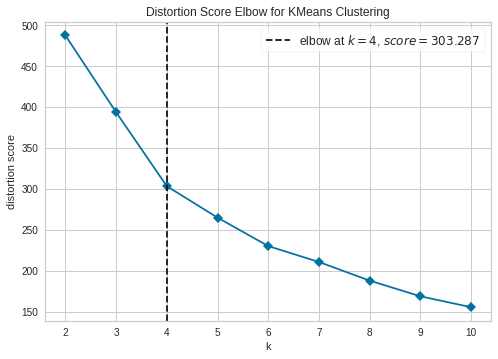

In [26]:
# Elbow Plot
plot_model(kmeans, plot = 'elbow')


**Note:** The elbow method above suggests that 4 amount of numbers is the optimal number of clusters. [More info about elbow plot](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

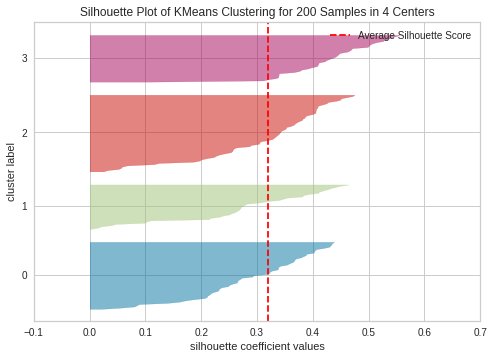

In [27]:
# Silhouette Plot
plot_model(kmeans, plot = 'silhouette')

**Note:** The silhouette value measures the similarity of an object compared to it's own cluster (cohesion) compared to other clusters (separation). [More info about Silhouette Plot](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [28]:
# Distribution Plot - to see the size of the clusters
plot_model(kmeans, plot = 'distribution')

**Note:** From the example above, we can observe that cluster 2 has the highest number of samples. We can also use the 'distribution' plot to see the distribution of cluster labels in association with any other numeric or categorical features with the example below.

In [32]:
plot_model(kmeans, plot = 'distribution', feature = 'Annual Income (k$)')

**Stage 6:** Assigning Cluster Labels to dataset

In [34]:
kmeans_results = assign_model(kmeans)
kmeans_results.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
195,196,Female,35,120,79,Cluster 3
196,197,Female,45,126,28,Cluster 1
197,198,Male,32,126,74,Cluster 3
198,199,Male,32,137,18,Cluster 1
199,200,Male,30,137,83,Cluster 3


**Stage 7:** Predicting Cluster Labels on Unseen Data

In [36]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,191,Female,34,103,23,Cluster 1
1,192,Female,32,103,69,Cluster 3
2,193,Male,33,113,8,Cluster 1
3,194,Female,38,113,91,Cluster 3
4,195,Female,47,120,16,Cluster 1


**Note:** The 'Cluster' column indicates the cluster labels predicted from the trained kmeans model and its added onto data_unseen

**Stage 8:** Saving the Model

In [37]:
save_model(kmeans,'Final Kmeans Model 12Jan2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['CustomerID'],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_nu...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 